In [9]:
#!pip install geopandas 

In [10]:
#!conda install rtree

In [11]:
# I typed this in the evnironment (newpy is the name of the environment):
#python -m ipykernel install --user --name newpy 

In [12]:
# https://geopandas.org/en/stable/getting_started/install.html

In [13]:
import geopandas as gpd

Before going into the multiple spatial filetypes GeoPandas can read, it’s important to distinguish the different types of spatial data. The type of data we are dealing with informs what tools we should use to analyze and then visualize the data. 

Basically, there are two main types of spatial data:

## 1)Vector data. It describes the features of geographic locations on Earth through the use of discrete geometries, namely:
#### Point: Individual locations, like a building, or a car, with X and Y coordinates.
#### Line: A series of connected points describing things like roads or streams.
#### Polygon: Formed by a closed line that encircles an area, such as the boundaries of a country. Additionally, when one feature consists of multiple geometries, we call it MultiPolygon.
## 2)Raster data. Encodes the world as a continuous surface represented by a grid, such as the pixels of an image. Each piece of the grid can be either a continuous value (such as an elevation value) or a categorical classification (such as land cover classifications). Classic examples include altitude data or satellite images.
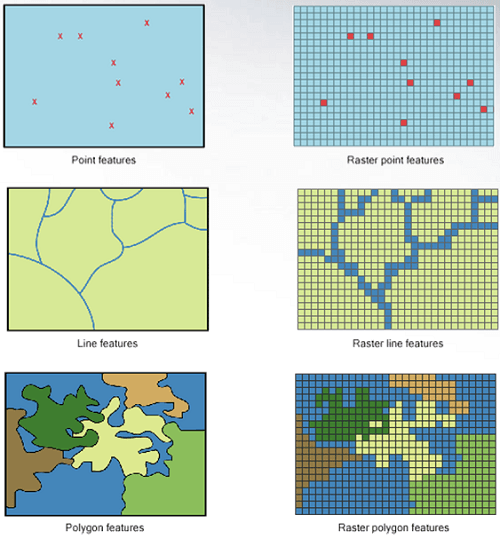

Both vector and raster data usually come together with non-spatial data, also known as attributes. Spatial data can have any number of additional attributes accompanying information about the location. For example, the location of a school can be associated with the name of the school, the number of students, or the address.

GeoPandas is designed to work with vector data, although it can easily team up with other Python packages to deal with raster data, like rasterio. To read spatial data, GeoPandas comes with the geopandas.read_file() function. This powerful function can automatically read most of the occurring vector-based spatial data.

Some of the most common vector data formats are:

Shapefile. As the industry standard, shapefiles are the most common vector data format. It comprises three files that are usually provided in a zip file:
The .shp file contains shape geometry.
The .dbf file holds attributes for each geometry,
The .shx file or shape index file helps link the attributes to the shapes.
GeoJSON. It’s a newer format for geospatial data released in 2016. Unlike shapefiles, GeoJSON is a single file, making it easier to work with.

In [15]:
#import sys

In [16]:
#'geopandas' in sys.modules

In [17]:
#!conda install -c conda-forge geopandas

In [18]:
#conda list 

# loading the dataset

In [92]:
# url = 'https://raw.githubusercontent.com/jcanalesluna/bcn-geodata/master/districtes/districtes.geojson'

# districts = gpd.read_file(url)
districts = gpd.read_file('districtes_topo.json')
districts

,id,codi,districte,geometry
0,None,01,Ciutat Vella,"POLYGON ((2.18239 41.39143, 2.18346 41.39061, ..."
1,None,02,Eixample,"POLYGON ((2.18239 41.39143, 2.18135 41.39222, ..."
2,None,03,Sants-Montjuïc,"POLYGON ((2.16785 41.37498, 2.16855 41.37495, ..."
3,None,04,Les Corts,"POLYGON ((2.10292 41.40110, 2.10295 41.40110, ..."
4,None,05,Sarrià-Sant Gervasi,"MULTIPOLYGON (((2.07211 41.41271, 2.07050 41.4..."
5,None,06,Gràcia,"POLYGON ((2.16866 41.40696, 2.16979 41.40608, ..."
6,None,07,Horta-Guinardó,"POLYGON ((2.17615 41.42544, 2.17654 41.42500, ..."
7,None,08,Nou Barris,"POLYGON ((2.18745 41.46212, 2.18750 41.46133, ..."
8,None,09,Sant Andreu,"POLYGON ((2.20720 41.42756, 2.20557 41.42831, ..."
9,None,10,Sant Martí,"POLYGON ((2.20720 41.42756, 2.20714 41.42748, ..."


In [87]:
districts.shape

(10, 4)

In [88]:
#districts['ID_ANNEX'].unique()

In [89]:
# you save the district GeoDataFrame into a geoJSON file:
#districts.to_file("districts.geojson", driver="GeoJSON")

#### Another important feature of GeoDataFrames is that every GeoSeries comes with associated CRS information. This CRS information tells GeoPandas where the coordinates are located on Earth. This information is key for spatial analysis. For example, if you need to combine two spatial datasets, you need to make sure they are expressed in the same CRS. Otherwise, you won’t get the result you expected.

There are two main categories of CRS:

#### Geographic coordinates. They define a global position in degrees of latitude and longitude relative to the equator and the prime meridian. With this system, we can easily specify any location on earth. It is used widely, for example, in GPS. The most popular CRS is EPSG:4326, also called WGS84.
#### Projected coordinates. While Earth is round, we usually represent it on a two-dimension map. Projected coordinates express locations in X and Y dimensions, thereby allowing us to work with a length unit, such as meters, instead of degrees, which makes the analysis more convenient and effective. However, moving from the three-dimensional Earth to a two-dimensional map will inevitably result in distortions. That’s why there are different approaches to creating projected coordinates. For example, many countries have adopted a standard projected CRS for their particular geography.

In [108]:
# coordinate reference systems (CRS).
#This CRS information tells GeoPandas where the coordinates are located on Earth

In [94]:
districts.columns

Index(['id', 'codi', 'districte', 'geometry'], dtype='object')

In [95]:
#The area attribute returns the calculated area of a geometry. We can save the resulting area (converted to km2) in a new column:
districts['area'] = districts.area / 1000000

districts

C:\Users\mohammed\AppData\Local\Temp\ipykernel_90416\769519032.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  districts['area'] = districts.area / 1000000


,id,codi,districte,geometry,area
0,None,01,Ciutat Vella,"POLYGON ((2.18239 41.39143, 2.18346 41.39061, ...",4.704081e-10
1,None,02,Eixample,"POLYGON ((2.18239 41.39143, 2.18135 41.39222, ...",8.055242e-10
2,None,03,Sants-Montjuïc,"POLYGON ((2.16785 41.37498, 2.16855 41.37495, ...",2.469695e-09
3,None,04,Les Corts,"POLYGON ((2.10292 41.40110, 2.10295 41.40110, ...",6.482426e-10
4,None,05,Sarrià-Sant Gervasi,"MULTIPOLYGON (((2.07211 41.41271, 2.07050 41.4...",2.165300e-09
5,None,06,Gràcia,"POLYGON ((2.16866 41.40696, 2.16979 41.40608, ...",4.510247e-10
6,None,07,Horta-Guinardó,"POLYGON ((2.17615 41.42544, 2.17654 41.42500, ...",1.287777e-09
7,None,08,Nou Barris,"POLYGON ((2.18745 41.46212, 2.18750 41.46133, ...",8.670831e-10
8,None,09,Sant Andreu,"POLYGON ((2.20720 41.42756, 2.20557 41.42831, ...",7.077404e-10
9,None,10,Sant Martí,"POLYGON ((2.20720 41.42756, 2.20714 41.42748, ...",1.133993e-09


#### Centroid
The centroid attribute returns the center point of a geometry. We can add it to our dataset, thereby creating a new geometry column.

In [96]:
districts['centroid']=districts.centroid

districts

C:\Users\mohammed\AppData\Local\Temp\ipykernel_90416\3643868570.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  districts['centroid']=districts.centroid


,id,codi,districte,geometry,area,centroid
0,None,01,Ciutat Vella,"POLYGON ((2.18239 41.39143, 2.18346 41.39061, ...",4.704081e-10,POINT (2.18105 41.38084)
1,None,02,Eixample,"POLYGON ((2.18239 41.39143, 2.18135 41.39222, ...",8.055242e-10,POINT (2.16449 41.39162)
2,None,03,Sants-Montjuïc,"POLYGON ((2.16785 41.37498, 2.16855 41.37495, ...",2.469695e-09,POINT (2.14493 41.34995)
3,None,04,Les Corts,"POLYGON ((2.10292 41.40110, 2.10295 41.40110, ...",6.482426e-10,POINT (2.11821 41.38697)
4,None,05,Sarrià-Sant Gervasi,"MULTIPOLYGON (((2.07211 41.41271, 2.07050 41.4...",2.165300e-09,POINT (2.10612 41.41277)
5,None,06,Gràcia,"POLYGON ((2.16866 41.40696, 2.16979 41.40608, ...",4.510247e-10,POINT (2.15240 41.41015)
6,None,07,Horta-Guinardó,"POLYGON ((2.17615 41.42544, 2.17654 41.42500, ...",1.287777e-09,POINT (2.15053 41.42914)
7,None,08,Nou Barris,"POLYGON ((2.18745 41.46212, 2.18750 41.46133, ...",8.670831e-10,POINT (2.17506 41.44624)
8,None,09,Sant Andreu,"POLYGON ((2.20720 41.42756, 2.20557 41.42831, ...",7.077404e-10,POINT (2.19331 41.43505)
9,None,10,Sant Martí,"POLYGON ((2.20720 41.42756, 2.20714 41.42748, ...",1.133993e-09,POINT (2.20122 41.40761)


### Boundary
The boundary attribute within the boundary of a polygon. 

In [97]:
districts['boundary']=districts.boundary


# Distance
The distance method gives the minimum distance from a geometry to a location. Say we want to calculate the distance from the famous Sagrada Familia church, located in the Eixample district, to the centroids of every district in Barcelona, and then add the distances (in kilometers) in a new column. 

In [98]:
from shapely.geometry import Point

In [99]:
sagrada_fam = Point(2.1743680500855005, 41.403656946781304)
sagrada_fam = gpd.GeoSeries(sagrada_fam, crs=4326)
sagrada_fam= sagrada_fam.to_crs(epsg=2062)
districts['sagrada_fam_dist'] = [float(sagrada_fam.distance(centroid)) / 1000 for centroid in districts.centroid]

C:\Users\mohammed\AppData\Local\Temp\ipykernel_90416\3038890958.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  districts['sagrada_fam_dist'] = [float(sagrada_fam.distance(centroid)) / 1000 for centroid in districts.centroid]
C:\Users\mohammed\AppData\Local\Temp\ipykernel_90416\3038890958.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  districts['sagrada_fam_dist'] = [float(sagrada_fam.distance(centroid)) / 1000 for centroid in districts.centroid]


In [100]:
districts

,id,codi,districte,geometry,area,centroid,boundary,sagrada_fam_dist
0,None,01,Ciutat Vella,"POLYGON ((2.18239 41.39143, 2.18346 41.39061, ...",4.704081e-10,POINT (2.18105 41.38084),"LINESTRING (2.18239 41.39143, 2.18346 41.39061...",1335.056387
1,None,02,Eixample,"POLYGON ((2.18239 41.39143, 2.18135 41.39222, ...",8.055242e-10,POINT (2.16449 41.39162),"LINESTRING (2.18239 41.39143, 2.18135 41.39222...",1335.056395
2,None,03,Sants-Montjuïc,"POLYGON ((2.16785 41.37498, 2.16855 41.37495, ...",2.469695e-09,POINT (2.14493 41.34995),"LINESTRING (2.16785 41.37498, 2.16855 41.37495...",1335.056435
3,None,04,Les Corts,"POLYGON ((2.10292 41.40110, 2.10295 41.40110, ...",6.482426e-10,POINT (2.11821 41.38697),"LINESTRING (2.10292 41.40110, 2.10295 41.40110...",1335.056435
4,None,05,Sarrià-Sant Gervasi,"MULTIPOLYGON (((2.07211 41.41271, 2.07050 41.4...",2.165300e-09,POINT (2.10612 41.41277),"MULTILINESTRING ((2.07211 41.41271, 2.07050 41...",1335.056430
5,None,06,Gràcia,"POLYGON ((2.16866 41.40696, 2.16979 41.40608, ...",4.510247e-10,POINT (2.15240 41.41015),"LINESTRING (2.16866 41.40696, 2.16979 41.40608...",1335.056394
6,None,07,Horta-Guinardó,"POLYGON ((2.17615 41.42544, 2.17654 41.42500, ...",1.287777e-09,POINT (2.15053 41.42914),"LINESTRING (2.17615 41.42544, 2.17654 41.42500...",1335.056384
7,None,08,Nou Barris,"POLYGON ((2.18745 41.46212, 2.18750 41.46133, ...",8.670831e-10,POINT (2.17506 41.44624),"LINESTRING (2.18745 41.46212, 2.18750 41.46133...",1335.056355
8,None,09,Sant Andreu,"POLYGON ((2.20720 41.42756, 2.20557 41.42831, ...",7.077404e-10,POINT (2.19331 41.43505),"LINESTRING (2.20720 41.42756, 2.20557 41.42831...",1335.056346
9,None,10,Sant Martí,"POLYGON ((2.20720 41.42756, 2.20714 41.42748, ...",1.133993e-09,POINT (2.20122 41.40761),"LINESTRING (2.20720 41.42756, 2.20714 41.42748...",1335.056355


## Plotting with GeoPandas

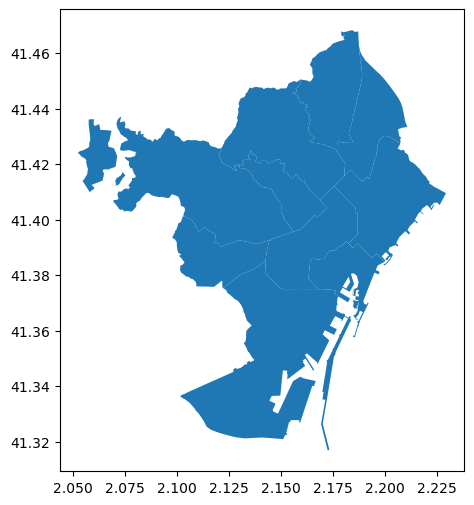

In [101]:
ax = districts.plot(figsize=(10,6))

#### We can make our GeoPandas plot more informative by coloring each district. Setting the legend to 'True' creates a legend to help interpret the colors.

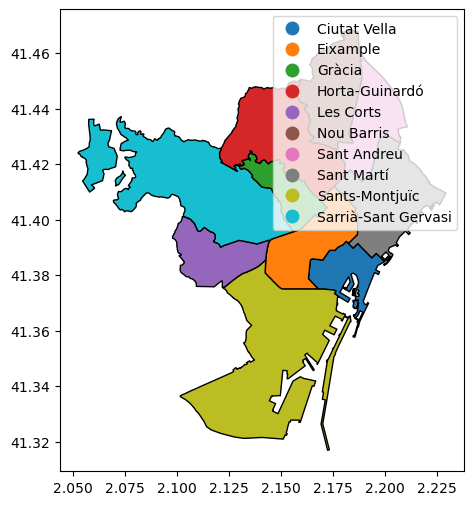

In [102]:
ax= districts.plot(column='districte', figsize=(10,6), edgecolor='black', legend=True)